In [1]:
# Descomente para instalar as bibliotecas utilizadas neste material
# !pip install -U qiskit
# !pip install qiskit[visualization]
# !pip install numpy
# !pip install math

In [2]:
# Verificação de versão do qiskit
# Notebook originalmente executado na versão 1.2.2 do qiskit e 3.12.7 do python
from qiskit.version import get_version_info as qiskitVersion
print(qiskitVersion())

1.2.2


In [3]:
# Importação dos módulos específicos a serem utilizados durante a elaboração do circuito
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basic_provider import BasicProvider
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram,plot_bloch_multivector
from math import pi
from qiskit.circuit.library import DiagonalGate
import numpy as np
from math import sqrt,floor

Código completo para execução do algorítmo de grover

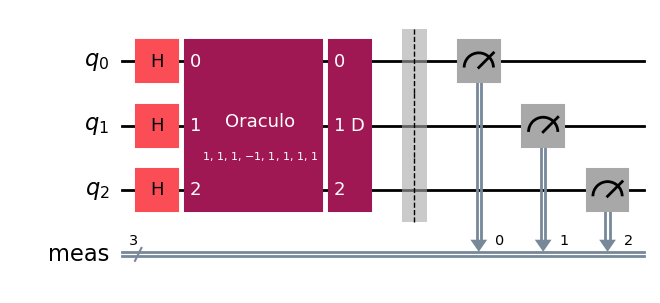

In [4]:
# Declaração de parâmetros iniciais
N=3
faseBuscada='011'

#preparação da matriz de rotaço
diagonalMatrizRotacao = -np.ones(2**N,dtype=int)
diagonalMatrizRotacao[0] = 1
matrizRotacao = DiagonalGate(diagonalMatrizRotacao)
matrizRotacao.name = 'R'

#preparação da matriz de difusão
matrizDifusao = QuantumCircuit(N, name='D')
matrizDifusao.h(range(N))
matrizDifusao.append(matrizRotacao,range(N))
matrizDifusao.h(range(N))

#preparação do oráculo
rotacaoFase = np.ones(2**N,dtype=int)
rotacaoFase[int(faseBuscada,2)] = -1
oraculo = DiagonalGate(rotacaoFase)
oraculo.name='oraculo'

#Passo 1
Grover = QuantumCircuit(N)
Grover.h(range(N))

#passo 2
for i in range(floor(sqrt(N))):
    #etapa I
    Grover.append(oraculo,range(N))
    #etapa II
    Grover.append(matrizDifusao,range(N))

#passo 3
Grover.measure_all()

Grover.draw('mpl')

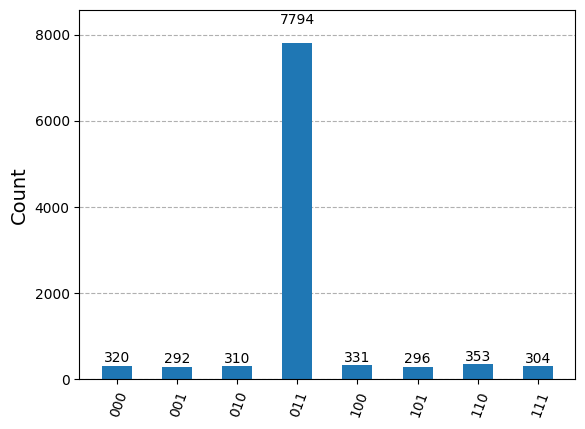

In [5]:
# Execução e plot dos resultados, backendo utilizado da seção anterior
provider = BasicProvider()
backend=provider.get_backend("basic_simulator")
new_circuit = transpile(Grover, backend)
job = backend.run(new_circuit, shots=10000)
result = job.result()

counts = result.get_counts(Grover)
plot_histogram(counts)

Algoritmo de Grover adaptado para duas buscas simultâneas

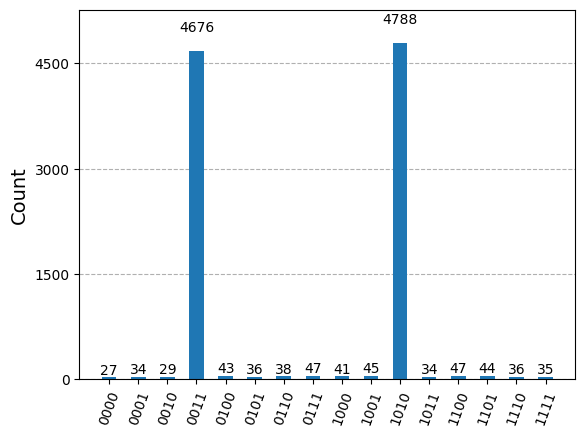

In [6]:
N=4
faseBuscada=['0011','1010']

#preparação da matriz de rotaço
diagonalMatrizRotacao = -np.ones(2**N,dtype=int)
diagonalMatrizRotacao[0] = 1
matrizRotacao = DiagonalGate(diagonalMatrizRotacao)
matrizRotacao.name = 'R'

#preparação da matriz de difusão
matrizDifusao = QuantumCircuit(N, name='D')
matrizDifusao.h(range(N))
matrizDifusao.append(matrizRotacao,range(N))
matrizDifusao.h(range(N))

#preparação do oráculo
rotacaoFase = np.ones(2**N,dtype=int)
#rotaciona cada estado buscado
for estado in faseBuscada:
    rotacaoFase[int(estado,2)] = -1
oraculo = DiagonalGate(rotacaoFase)
oraculo.name='oraculo'

#Passo 1
Grover = QuantumCircuit(N)
Grover.h(range(N))

#passo 2
for i in range(floor(sqrt(N))):
    #etapa I
    Grover.append(oraculo,range(N))
    #etapa II
    Grover.append(matrizDifusao,range(N))

#passo 3
Grover.measure_all()

new_circuit = transpile(Grover, backend)
job = backend.run(new_circuit, shots=10000)
result = job.result()

counts = result.get_counts(Grover)
plot_histogram(counts)